# Egydimenziós peremérték feladatok

Egy legalább másodrendű közönséges differenciálegyenlet esetén akkor beszélünk peremérték problémáról, ha az ismeretlen függvény és bizonyos deriváltjai közül egyaránt előfordulnak olyanok, melyek értékét a tekintett intervallum kezdőpontjában rögzítjük és olyanok is, melyek értékét az intervallum végpontban tételezzük fel ismertnek. A peremérték problémák tanulményozásának fő motivációja, hogy

1. peremérték problémák természetes módon bukkannak fel a fizika és a mérnöki tudományok több területén: hőtan, diffúzió, szilárdságtan, elektrosztatika, áramlástan, kvantummechanika, stb.;

2. az egydimenziós peremérték feladatok jó átvezetést nyújtanak a parciális differenciálegyenletek numerikus módszereihez, hiszen az itt bemutatott feladatok többsége valamilyen időfüggő PDE állandósult (stacionárius) megoldásának meghatározását tűzi ki célul.

A kezdetiérték feladatokkal ellentétben előfordulhat, hogy egy peremérték problémának nincs megoldása vagy éppenséggel végtelen sok megoldása van. Könnyen találhatunk ilyenre példát az állandóegyütthatós másodrendű lineáris differnciálegyenletek körében. Vegyük például az
$$
y''(x)+a^2 y(x) = 0,\,\,y(0)=0,\,\,y(1)=1
$$
feladatot. Mutassuk meg, hogy az $a\in\mathbb{R}$ paraméter függvényében lehet $0$, $1$ vagy végtelen sok megoldás.

Lényegében ez a jelenség játszik szerepet abban, hogy például a kvantummechanikában a harmonikus oszcillátor sajátérték egyenletének (ami egy másodrendű, nem állandóegyütthatós, lineáris KDE-re felírt peremérték probléma) csak bizonyos paraméterek (energiák, sajátértékek) esetén van megoldása és ott ezeket a "mágikus" paraméter értékeket hívják kvantumszámoknak.

A megoldási módszerek tekintetében négy nagy numerikus módszer családot érdemes kiemelni:

1. **Lövöldözés:** a premérték feladatot az intervallum egyik végpontjánál kezdeti érték feladattá egészítjük ki, amit valamilyen ODE megoldóval megoldunk és a végpontbeli értéket valamilyen nemlineáris egyenletmegoldóval ráillesztjük az előírt értékre. Ez a módszer értelemszerűen csak egy dimenzióban működik jól.

2. **Véges differencia módszer:** itt a deriváltakat helyettesítjük véges differenciákkal, így lineáris KDE-ek esetén lineáris egyenletrendszereket nyerünk. Hátránya egydimenzióban, hogy csak rácspontokban állítja elő a megoldást, továbbá bizonyos esetekben okosan (nem egyenközűen) kell rácsozni. Magasabb dimenzióban, nem tégla tartományok esetén egyértelmű hátrány a fix téglalap rács.

3. **Kollokációs módszerek:** egy paraméteres függvénycsaláddal közelítjük a megoldást, ahol a paramétertér véges dimenziós. A közelítés történhet például legkisebb négyzetek értelemben, ahol vagy eleve a függvénycsalád teljesíti a peremfeltételeket, vagy a peremfeltételeket a hibafüggvény tartalmazza. Ez utóbbi esetben a peremfeltételek csak közelítőleg teljesülnek. Fontos speciális eset, amikor az $L^2 ([0,L])$ tér valamely véges dimenziós alterében tekintünk egy $\phi_1,\ldots,\phi_n$ bázist és a megoldást ezek lineáris kombinációiként keressük. Lineáris differenciálegyenletek esetén lineáris egyenletrendszereket kapunk. Ebbe a módszercsaládba sorolható a véges elem módszer is, ahol a bázisfüggvényeket úgy választjuk, hogy függvények tartói a $[0,L]$ intervallum egy felosztását adják.

4. **Monte-Carlo módszerek:** ez egy rácsfüggetlen módszercsalád, melynek alapját az adja, hogy a másodrendű lineáris parabolikus és elliptikus PDE-ekre felírt peremérték problémák (1D-ban értelemszerűen KDE-k) és Ito-féle diffúziós folyamatok között 1-1 értelmű megfeleltetés létesíthető. Ezzel a módszercsaláddal külön leckében foglalkozunk.

## Feladat: Lövöldözés

Az ember nem is gondolná, hogy olyan banális helyzetekben mint amilyen például a labda dobása a társunknak valamilyen játék közben, az agyunk peremérték problémát old meg anélkül, hogy ez bennünk tudatosulna. 

A Scipy odeint és fsolve parancsait felhasználva írjunk programot annak meghatározására, hogy mekkora sebességgel és milyen szögben kell eldobnunk egy labdát (homogén gravitációs térben mozgó tömegpontnak tekinthető) ahhoz, hogy azt a tőlünk öt méterre álló társunk $T$ idő múlva az eldobással megegyező magasságban kapja el, ha

1. nincs légellenállás (lineáris lesz a peremérték probléma);

2. van légellenállás, a labda gömb alakú, 30cm átmérőjű (négyzetes légellenállást feltételezve a peremérték feladat nemlineáris lesz).

## Példa: véges differencia módszer

Egy $L=1.0$ m hosszú rézrúd bal végpontja hőszigetelt (Neumann perem), jobb vége pedig olvadó jégbe merül (Dirichlet perem). A rúd bal vége alá égő gyertyát helyezünk. Véges differencia módszer segítségével határozzuk meg, hogy hosszú idő után, amikor már állandósult a hőmérséklet, a bal végponthoz legalább milyen messze foghatjuk meg a rudat, hogy az ne égesse meg a kezünket. Tegyük fel, hogy a kezünk csak 50°C-ot bír ki.

A rúd hosszához képest a keresztmetszet irányú kiterjedése elhanyagolható, a hőmérséklet eloszlást a keresztmetszetekben homogénnek tételezzük fel. Mivel az állandósult hőmérsékletre vagyunk kiváncsiak a szokásos hővezetési egyenletből a $\partial_t T$ tagot elhagyjuk, a hőmérsékletet pedig a $T:[0,L]\to [0,\infty)$ egyváltozós, kétszer folytonosan differenciálható függvénnyel írjuk le, mely megoldása a
\begin{align}
\frac{\mathrm{d}^2 T}{\mathrm{d}x^2} &= -\frac{\eta P}{\lambda A}\delta (x) \\
\frac{\mathrm{d} T}{\mathrm{d}x}(0) &=0\, Km^{-1},\,\,T(1)=273 K
\end{align}
peremérték problémának, ahol $A$ a keresztmetszet területe, $P=30$ W a gyertya teljesítménye, $\eta=0.3$ a fűtés hatásfoka, és $\lambda = 401 \frac{W}{m\cdot K}$ a réz hővezetési együtthatója, $\delta (x)$ pedig a Dirac-féle "$\delta$-függvény".

**1. Lépés: diszkretizáljuk a feladatot**

A $[0,1]$ intervallumot fix $N+1$db osztóponttal $N$ számú $\Delta x=\frac{1}{N}$ méter hosszúságú cellákra osztjuk, a megoldást pedig az osztópontokban számoljuk ki, azaz $T ((i-1)\Delta x)\approx\mathbf{T}_i$ $i=1,2,\ldots, N+1$ lesz, ahol $\mathbf{T}\in\mathbb{R}^{N+1}$. Ennek megfelelően $\delta$-függvény diszkretizált változata
$$
[\mathbf{\delta}]_i = \begin{cases}
\frac{1}{\Delta x} = N \text{, ha } i=1\\
0 \text{ egyébként.}
\end{cases}
$$

A deriváltat az osztópontokban véges differenciákkal közelítjük:
$$
\frac{\mathrm{d}^2 T}{\mathrm{d}x^2} ((i-1)\Delta x)\approx [\mathbf{D}\mathbf{T}]_i =\frac{1}{\Delta x^2}(\mathbf{T}_{i+1}+\mathbf{T}_{i-1}-2\mathbf{T}_i),\,i=2,\ldots,N.
$$

A végpontokban pedig a $\mathbf{T}_0$ és $\mathbf{T}_{N+2}$ ún. szellempontokat bevezetve a peremfeltételeket felhasználva az alábbiakat kapjuk.
\begin{align}
\frac{\mathrm{d} T}{\mathrm{d}x}(0) &=0 \Rightarrow \mathbf{T}_0 = \mathbf{T}_1 \Rightarrow [\mathbf{D}\mathbf{T}]_1 =\frac{1}{(\Delta x)^2}(\mathbf{T}_{2}-\mathbf{T}_1) \\
T(1)&=273\Rightarrow \mathbf{T}_{N+1} = \mathbf{T}_{N+2} = 273
\Rightarrow [\mathbf{D}\mathbf{T}]_{N+1}=\frac{1}{(\Delta x)^2}(\mathbf{T}_{N}-273)
\end{align}

A példában $r=1.0$ cm átmérőjű rézrúddal fogunk számolni.

**2. Lépés: egyenletrendszer felírása**

$$
\mathbf{D}\cdot \mathbf{T} = \frac{273}{(\Delta x)^2}\mathbf{e}_{N+1}-\frac{\eta P}{\lambda A}\mathbf{\delta}
$$

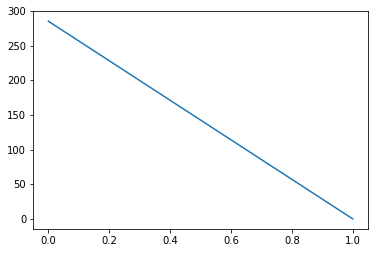

In [61]:
import numpy as np
from scipy.sparse import spdiags
from scipy.sparse.linalg import spsolve
from matplotlib import pyplot as plt

# Adatok
P = 30
eta = 0.3
l = 401
d = 0.01 # rúd átmérője

T1 = 273  # jobb végpont hőmérséklete

N = 1000
dx = 1/N  # Delta x

A = np.pi*0.25*d**2.0

f = np.zeros((N+1,1))  # ez pedig az egyenlet jobboldala
f[0,0] = -eta*P/(l*dx*A)
f[-1,0]= T1/(dx**2.0)

# Differenciáloperátor felépítése ritka mátrixokkal
entrs = np.ones((3, N+1))
entrs[0,:] = -2.0*entrs[0,:]
entrs[0,0] = -1.0
entrs[0,-1]=  0.0

D = (1/dx**2.0)*spdiags(entrs, np.array([0, -1, 1]), N+1, N+1, format='csc')

# Egyenlet megoldása
T = spsolve(D, f)

# Eredmények kirajzolása
x = dx*np.arange(N+1)

plt.plot(x,T-273)  # A végétől kb. 20cm-re még meg lehet fogni

## Példa: gerenda lehajlása (kollokáció Legendre polinomokkal, Galjorkin módszer)

Ebben a feladatban konzolos befogású gerenda (gondolhatunk a strandon az ugródeszkára vagy asztallaphoz szorított vonalzóra) lehajlását fogjuk numerikusan meghatározni a gerenda bizonyos jellemzőinek és a terhelés függvényében.

Tekintsünk egy $L>0$ gerendát, melyet $q:[0,L]\to\mathbb{R}$ megoszló erő terhel. Az Euler-Bernoulli-féle gerenda elmélet szerint a semleges szál függőleges irányú lehajlása $y:[0,L]\to\mathbb{R}$ és a terhelés között a
$$
y^{(4)}(x)=\frac{q(x)}{EI}
$$
negyedrendű lineáris differenciálegyenlet teremt kapcsolatot, ahol $E$ a rugalmassági modulus, $I$ pedig a keresztmetszet másodrendű nyomatéka ![tarto](./konzolostarto.jpeg).

A keresztmetszetben ébredő nyíróerő egyébként $Q(x)=-EI y'''(x)$, a nyomaték pedig $M(x)=-EI y''(x)$. Az egyik végén konzolosan befogott gerendához tartozó peremfeltételek tehát $y(0)=y'(0)=0$ és $y''(L)=y'''(L)=0$, hiszen a bal vég nem hajolhat el vizszintestől, a jobb véget pedig sem koncentrált erő, sem nyomaték nem terheli.

Példánkban egy $30$cm hosszú, egyik végénél az asztal lapjára leszorított polisztirol vonalzó lehajlását fogjuk vizsgálni, amint azt egy $5$cm hosszú $20$g-os radír terheli. A vonalzót $b=4$cm széles és $h=2$mm vastag téglalap keresztmetszetű gerendának vesszük.

Adatok: $E = 3.25 GPa =3.25\times 10^9 \frac{N}{m^2}=3250\frac{N}{mm^2}$, $I=\frac{bh^3}{12}=\frac{8}{3}\times 10^{-11} m^4 = \frac{80}{3} mm^4$. A radírt pedig megoszló tehernek vesszük $q=4\times 9.81\times 10^{-4}\frac{N}{mm}$.

A vonalzó lehajlását Galjorkin módszerrel számítjuk. Mivel az egyenlet negyedrendű, olyan véges elem bázisfüggvényekre van szükségünk, melyek negyedik deriváltja sem tűnik el.

In [384]:
import autograd.numpy as np
from autograd import elementwise_grad as egrad
from scipy.integrate import quad
from autograd.numpy.linalg import lstsq
from autograd.numpy import vectorize

"""
A gyenge alak:

<y4,h> = -y3(0)h(0)-<y3,h1> = -y3(0)h(0)+y2(0)h1(0)+<y2,h2>

peremérték:
y(0)=y1(0)=0
y2(L)=y3(L)=0
"""

# import warnings
# warnings.filterwarnings("ignore")  # az autograd warning-ot dob, mert nem tetszik neki, hogy egy idő után konstans függvényt kapunk

E = 3250.0 # rugalmassági modulus
I = 80.0/3 # másodrendű nyomaték
L = 300.0  # Vonalzó hossza (mm)

# bázisfüggvények

ord = 20 # maximális rend
n = ord+1

phi = [[lambda x, k=k: (x/L)**k for k in range(n)]]  # default paraméter trükk!!!

# Szükség lesz a bázisfüggvények deriváltjaira harmad rendig bezárólag
for k in range(3):
    newrow = [egrad(j) for j in phi[-1]]
    phi.append(newrow)

# A merevségi mátrix előállítása
A = np.zeros((n+4,n))
for i in range(n):
    for j in range(n):
        scp, _ = quad(lambda x: phi[2][i](x)*phi[2][j](x), 0.0, L)
        A[i,j] = -phi[3][j](0.0)*phi[0][i](0.0)+phi[2][j](0.0)*phi[1][i](0.0)+scp

        
# Van még 4db peremfeltételünk 
A[n,:] = np.array([fun(0.0) for fun in phi[0]])
A[n+1,:] = np.array([fun(0.0) for fun in phi[1]])
A[n+2,:] = np.array([fun(L) for fun in phi[2]])
A[n+3,:] = np.array([fun(L) for fun in phi[3]])

# A megoldó mag függvény

def beam(q):
    """
    q a megoszló terhet leíró függvény
    """

    b = np.zeros((n+4,1))  # teher ventor
    for k in range(n):
        b[k,0], _ = quad(lambda x: phi[0][k](x)*q(x),0.0, L) 
       
    c = lstsq(A, b/(E*I),rcond=None)
    c = c[0]
    
    @vectorize
    def y(x):
        return c.T@np.array([fun(x) for fun in phi[0]])
    
    @vectorize
    def torque(x):
        return c.T@np.array([fun(x) for fun in phi[2]])
    
    @vectorize
    def shear(x):
        return c.T@np.array([fun(x) for fun in phi[3]])
    
    return y, torque, shear

In [385]:
# megoszló teher
q = lambda x: -(4.0*9.81e-4)*(250<=x)*(x<=300)
y, torque, shear = beam(q)

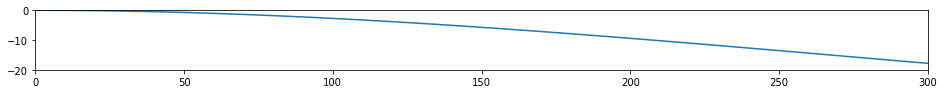

In [391]:
x = np.linspace(0.0, L, 100)
fig = plt.figure(figsize=4*plt.figaspect(1.0))
ax1 = fig.add_subplot(111,autoscale_on=False, xlim=(0.0, L), ylim=(-20.0, 0.0))

ax1.plot(x, y(x))
ax1.set_aspect('equal', 'box')

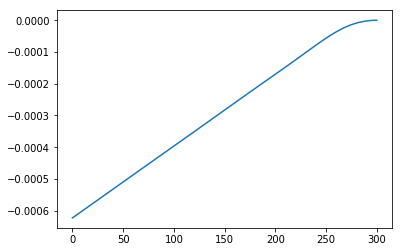

In [392]:
plt.plot(x,torque(x))

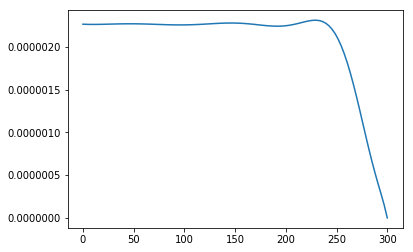

In [394]:
plt.plot(x,shear(x))

## Példa: stacionárius áramlás lemez mellett, a Blausius-egyenlet (kollokáció neurális hálókkal)

A hőátadás, adszorpció (gáz vagy folyadék felületen történő megkötődése), szilárd anyag oldása, keverés és sok más, vegyipari műveletek szempontjából fontos folyamat az áramló folyadék és szilárd anyag (edény fala, oldott anyag felszíne) találkozásánál az ún. *határrétegben* megy végbe, ezért kulcsfontosságú a határréteg viselkedésének a megértése áramlástani szempontból.

A folyadékok és gázok (együttes néven fluidumok) áramlását a Navier-Stokes egyenletek (NS) írják le. A NS-egyenletek numerikus megoldása igen műveletigényes, a nagyteljesítményű számítógépek megjelenése előtt pedig gyakorlatilag lehetetlen feladat volt. A kutatók ezért a határréteg leírásához bizonyos elhanyagolásokkal éltek.

Tekintsünk egy kétdimenziós állandósult (stacionárius), $x$-irányú lamináris áramlást egy egyirányból végtelen fal mellett. Tegyük fel, hogy az áramló fluidum összenyomhatatlan, továbbá sűrűsége és viszkozitása állandó és tekintsük azt az esetet, amikor a fluidum a faltól nagy távolságban állandó $U>0$ sebességgel áramlik:
![boundary](./BDlayer.png)

Az állandósult áramlásban a sebességmező $x$ (fallal párhuzamos) és $y$ (falra merőleges) komponensei legyenek $u,v:[0,\infty)^2\to\mathbb{R}$. Ezek a függvények eleget tesznek a
\begin{align}
\partial_x u + \partial_y v &= 0,\,\,\text{kontinuitási egyenlet}\\
u \partial_x u + v \partial_y u &=\nu\partial^2_{yy}u,
\,\,x-\text{irányú impulzustranszport egyenlet} 
\end{align}
egyszerűsített NS-egyenletre felírt $u(x,0)=0$, $v(x,0)=0$ és $u(x,\infty)=U$ peremérték problémának, ahol $\nu>0$ a fluidum kinematikai viszkozitása.

Blausius a fenti probléma olyan ún. *önhasonló megoldásait* kereste, melyek tetszőleges $c\ne 0$ koefficiens választás mellett a $x\to c^2 x$, $y\to cy$, $u\to u$, $v\to\frac{v}{c}$ transzformációra nézve invariánsak. Így jutott el a
$$
2 f''' + f'' f = 0,\,f(0)=f'(0)=0,\,f'(\infty)=1
$$
nemlineáris KDE-re felírt peremérték problémához, melyet megoldva a NS-egyenletre felírt peremérték probléma Blausius-féle önhasonló megoldásait
\begin{align}
u (x,y) &= U f'\left(a\right) \\
v (x,y) &= \frac{1}{2}\sqrt{\frac{\nu U}{x}}
\left( a f'\left(a\right)-f\left(a\right)\right)
\end{align}
alakban kapjuk, ahol $a=y\sqrt{\frac{U}{\nu x}}$.

### Szimuláció

A [2] honlapon található programkód a Blausius peremérték probléma megoldását neurális hálók segítségével állítja elő. Az alábbiakban ezt a megoldást fejlesztjük tovább, kiegészítve azzal, hogy nemcsak $f$-et, hanem a teljes sebességmezőt is kirajzoltatjuk.

A közelítő megoldást $\hat{f}(x,\theta)$ alakban keressük, ahol $\hat{f}$ egy olyan neurális háló átviteli függvénye, mely csupán egyetlen rejtett réteget tartalmaz nyolc neuronnal, $\theta$ a tanulási paraméter, aktivációs függvényként pedig a
$$
\sigma (x)=\frac{x}{1+e^{-x}}.
$$
Sigmoid linear unit (SiLU, Swish-1) függvényt használjuk. 

A neurális hálós megoldás lényege, hogy definiálunk egy hibafüggvényt (loss-function), mely azt méri, hogy a Blausius-egyenlet és a kapcsolódó peremfeltételek mennyire nem teljesülnek, a "tanítás" (inkább hívnám regressziónak) pedig voltaképpen nem más, mint a hibafüggvény minimalizálása a $\theta$ tanulási paraméter szerint.

A hibafüggvény legyen
$$
L(\theta) = \frac{1}{R}\int_0^R \left(2 \hat{f}'''(x,\theta) + \hat{f}''(x,\theta) \hat{f}(x,\theta)\right)^2\,\mathrm{d}x+\hat{f}(0,\theta)^2+\hat{f}'(0,\theta)^2+\left(\hat{f}'(R,\theta)-1\right)^2,
$$
ahol vesszővel az $x$-szerinti deriválást jelöltük, $R>0$ pedig egy olyan nagy véges pozitív számot jelöl, ami a fizikai probléma szempontjából gyakorlatilag "végtelennek tekinthető", vagyis a határréteg feltételezett vastagsát bőven meghaladja.


A fenti képletben a deriváltak számolását természetesen autograd-dal végezzük.

In [425]:
import autograd.numpy as np
from autograd import grad, elementwise_grad
import autograd.numpy.random as npr
from autograd.misc.optimizers import adam

def init_random_params(scale, layer_sizes, rs=npr.RandomState(0)):
    """Build a list of (weights, biases) tuples, one for each layer."""
    return [(rs.randn(insize, outsize) * scale,   # weight matrix
             rs.randn(outsize) * scale)           # bias vector
            for insize, outsize in zip(layer_sizes[:-1], layer_sizes[1:])]


def swish(x):
    "see https://arxiv.org/pdf/1710.05941.pdf"
    return x / (1.0 + np.exp(-x))


def f(params, inputs):
    "Neural network functions"
    for W, b in params:
        outputs = np.dot(inputs, W) + b
        inputs = swish(outputs)    
    return outputs

    
# Here is our initial guess of params:
params = init_random_params(0.1, layer_sizes=[1, 8, 1])

# Derivatives
fp = elementwise_grad(f, 1)
fpp = elementwise_grad(fp, 1)
fppp = elementwise_grad(fpp, 1)

eta = np.linspace(0, 6).reshape((-1, 1))

# This is the function we seek to minimize
def objective(params, step):
    # These should all be zero at the solution
    # f''' + 0.5 f'' f = 0
    zeq = fppp(params, eta) + 0.5 * f(params, eta) * fpp(params, eta) 
    bc0 = f(params, 0.0)  # equal to zero at solution
    bc1 = fp(params, 0.0)  # equal to zero at solution
    bc2 = fp(params, 6.0) - 1.0 # this is the one at "infinity"
    return np.mean(zeq**2) + bc0**2 + bc1**2 + bc2**2

def callback(params, step, g):
    if step % 1000 == 0:
        print("Iteration {0:3d} objective {1}".format(step,
                                                      objective(params, step)))

params = adam(grad(objective), params,
              step_size=0.001, num_iters=10000, callback=callback)
              
# a cél az, hogy
print('f(0) = {}'.format(f(params, 0.0)))    # ez legyen 0
print('fp(0) = {}'.format(fp(params, 0.0)))  # ez legyen 1
print('fp(6) = {}'.format(fp(params, 6.0)))  # ez legyen 0 szintén

Iteration   0 objective [[1.11472535]]
Iteration 1000 objective [[0.00049768]]
Iteration 2000 objective [[0.0004579]]
Iteration 3000 objective [[0.00041697]]
Iteration 4000 objective [[0.00037408]]
Iteration 5000 objective [[0.00033705]]
Iteration 6000 objective [[0.00031016]]
Iteration 7000 objective [[0.00029197]]
Iteration 8000 objective [[0.00027585]]
Iteration 9000 objective [[0.00024616]]
f(0) = [[-0.00014613]]
fp(0) = 0.0003518041251638071
fp(6) = 0.999518061473252


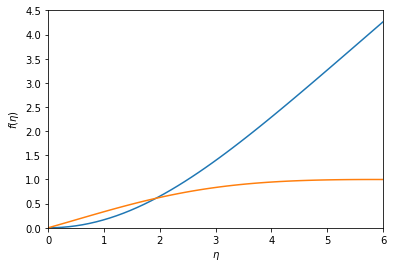

In [436]:
import matplotlib.pyplot as plt
plt.plot(eta, f(params, eta))
plt.plot(eta,fp(params, eta))
plt.xlabel('$\eta$')
plt.ylabel('$f(\eta)$')
plt.xlim([0, 6])
plt.ylim([0, 4.5])
plt.show()

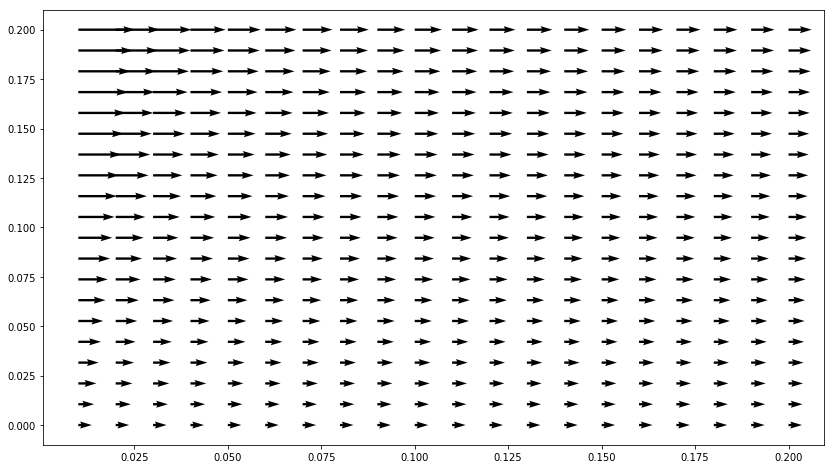

In [478]:
U = 3.0  # m/s áramlási sebesség a faltól messze
nu = 1.0e6  # m^2/s kinematikai viszkozitás

a = lambda x, y: y*np.sqrt(U/(nu*(x+1e-16)))
u = lambda x, y: U*fp(params, a(x, y))
v = lambda x, y: 0.5*np.sqrt(nu*U/(x+1e-16))*(a(x,y)*fp(params, a(x, y))-f(params, a(x, y)))

# Creating arrow
x = np.linspace(0.01, 0.2, 20)
y = np.linspace(0.0, 0.2, 20)
 
X, Y = np.meshgrid(x, y)

dx = np.zeros_like(X)
dy = np.zeros_like(Y)

for i in range(dx.shape[0]):
    for j in range(dx.shape[1]):
        dx[i,j] = u(X[i,j],Y[i,j])
        #dy[i,j] = v(X[i,j],Y[i,j])

# creating plot
fig, ax = plt.subplots(figsize =(14, 8))
ax.quiver(X, Y, dx, dy)

## Feladat: Stacionárius áramlás ék alakú profil körül, a Falkner--Skan-egyenlet

Nézzünk utána az ék alakú profil körüli stacionárius áramlás határréteg sebességmezőjét leíró Falkner--Skan-egyenletnek és próbáljuk meg előállítani a numerikus megoldást neurális hálók segítségével.

## Feladat: Scipy solver kipróbálása

A bemutatott példákban szereplő peremérték problémák közül bármelyiket választva állítsuk elő a numerikus megoldást a Scipy **solve_bvp** megoldója segítségével.

Lásd: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_bvp.html

## Feladat: végeselem módszer

Tetszőleges peremérték feladatot oldjunk meg Galjorkin végeselem módszerrel. A bázisfüggvények megalkotásához használjuk a Legendre polinomokat és figyeljünk a default paraméter trükkre, illetve arra, hogy az egyenletrendszer előállításánál előírjuk a szükséges belső perefeltételeket is.

Pythonból újdonság lehet, a @memoize dekorátor, ami arra jó, hogy rekurzívan definiált függvény korábbi értékeit eltároljuk azért, hogy a műveletigényt csökkentsük. Lásd: https://python-course.eu/advanced-python/memoization-decorators.php

In [395]:
import autograd.numpy as np
# Legendre polinomok rekurzív megadása
# https://www.math.tu-berlin.de/fileadmin/i26_ng-schmidt/Vorlesungen/IntroductionFEM_SS14/Chap4.pdf

def memoize(f):
    memo = {}
    def helper(x):
        if x not in memo:            
            memo[x] = f(x)
        return memo[x]
    return helper

@memoize
def Legendre(j):
    
    if j==0:
        return lambda x: np.ones_like(x)
    elif j==1:
        return lambda x: x
    else:
        Lj_1 = Legendre(j-1)
        Lj_2 = Legendre(j-2)
        return lambda x: ((2*j-1)/j)*x*Lj_1(x)-((j-1)/j)*Lj_2(x)
    
def FE1D(j):
    # 1D véges elem bázis [0,1]-en
    
    if j==0:
        return lambda x: 1-x
    elif j==1:
        return lambda x: x
    else:
        Lj = Legendre(j)
        Lj_2 = Legendre(j-2)
        
        return lambda x: (1/np.sqrt(2*(2*j-1)))*(Lj(2*x-1)-Lj_2(2*x-1))

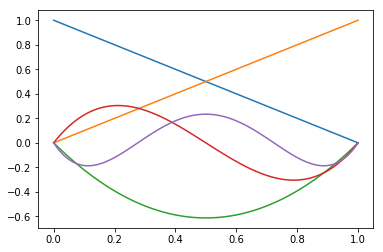

In [396]:
import matplotlib.pyplot as plt

x = np.linspace(0.0, 1.0, 100)

for k in range(5):
    N = FE1D(k)
    plt.plot(x,N(x))

# További olvasnivalók

1. https://pythonnumericalmethods.berkeley.edu

2. https://kitchingroup.cheme.cmu.edu/blog/2013/03/11/Solving-the-Blasius-equation/ (a Blausius-egyenletes példát innen vettem)

3. https://kitchingroup.cheme.cmu.edu/blog/2013/03/11/Solving-the-Blasius-equation/ (Blausius-egyenlet megoldása véges differencia módszerrel)

4. https://en.wikipedia.org/wiki/Blasius_boundary_layer (itt lehet elolvasni, hogy mi az a Blausius-egyenlet)

5. https://en.wikipedia.org/wiki/Falkner%E2%80%93Skan_boundary_layer (Falkner-Skan-egyenlet: a Blausius-egyenlet ék körüli áramlásra)

6. https://edu.epito.bme.hu/local/coursepublicity/mod/resource/view.php?id=58834 (Építőmérnök kari jegyzet peremérték feladatok témában)